In [117]:
csv_path = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/memory_ccm/Figures/similarity of maps/map_similarity_using_brain_p_organized.csv'

In [130]:
import pandas as pd
df = pd.read_csv(csv_path)
df.set_index("Unnamed: 0", inplace=True)

df

,pTBI,Strokes,Atrophy,Hypometabolism,PD DBS,Epilepsy DBS,AD DBS,Epilepsy iEEG
Unnamed: 0,,,,,,,,
pTBI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Strokes,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Atrophy,0.1500,0.2900,NaN,NaN,NaN,NaN,NaN,NaN
Hypometabolism,0.0350,0.5100,0.0001,NaN,NaN,NaN,NaN,NaN
PD DBS,0.0001,0.0001,0.0720,0.340,NaN,NaN,NaN,NaN
Epilepsy DBS,0.0300,0.0240,0.0001,0.014,0.0091,NaN,NaN,NaN
AD DBS,0.0470,0.6700,0.0560,0.470,0.3600,0.22,NaN,NaN
Epilepsy iEEG,0.0001,0.0077,0.4800,0.530,0.0001,0.06,0.0032,NaN


In [131]:
import numpy as np
df = np.log(df)
df = df.where(df <= -1.5, 0)
df

,pTBI,Strokes,Atrophy,Hypometabolism,PD DBS,Epilepsy DBS,AD DBS,Epilepsy iEEG
Unnamed: 0,,,,,,,,
pTBI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Strokes,-9.210340,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Atrophy,-1.897120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Hypometabolism,-3.352407,0.000000,-9.210340,0.000000,0.000000,0.000000,0.000000,0.0
PD DBS,-9.210340,-9.210340,-2.631089,0.000000,0.000000,0.000000,0.000000,0.0
Epilepsy DBS,-3.506558,-3.729701,-9.210340,-4.268698,-4.699481,0.000000,0.000000,0.0
AD DBS,-3.057608,0.000000,-2.882404,0.000000,0.000000,-1.514128,0.000000,0.0
Epilepsy iEEG,-9.210340,-4.866535,0.000000,0.000000,-9.210340,-2.813411,-5.744604,0.0


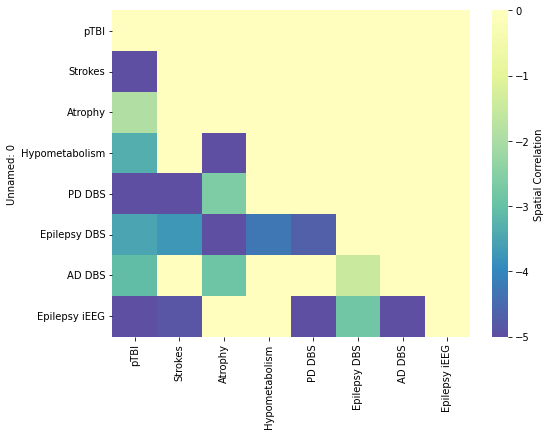

In [139]:
#Create heatmap of correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


# fig = plt.figure(figsize=(15, 13))

# # Define a custom color transition: red -> black -> green with black fading around ±0.1
# colors = [
#     (1, 0, 0),  # Red for negative values
#     (0.5, 0, 0),  # Darker red approaching black
#     (0, 0, 0),  # Black at 0
#     (0, 0.5, 0),  # Darker green close to black
#     (0, 1, 0)    # Green for positive values
# ]

# # Create the custom colormap with transitions, controlling how fast the black fades
# n_bins = 500  # More bins for smoother transitions
# custom_cmap = LinearSegmentedColormap.from_list("red_black_green", colors, N=n_bins)

# Plotting a heatmap using the adjusted palette

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df, cmap='Spectral_r', center=0, ax=ax, cbar=True, vmin = -5, vmax = 0, cbar_kws={'label': 'Log p-value'})

plt.savefig('/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/memory_ccm/Figures/similarity of maps/figs/ps.svg')
# sns.heatmap(df, cmap='icefire',square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)    

Custom Heatmap

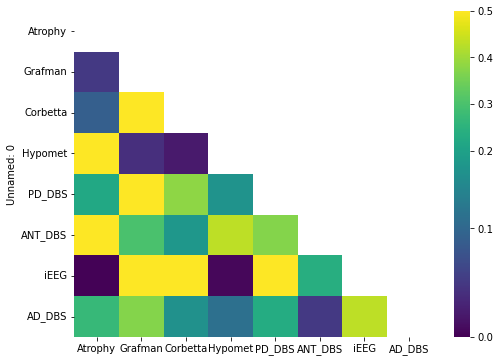

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize, TwoSlopeNorm
import matplotlib.cm as cm
# Custom normalization function
class CustomNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, vcenter=None, **kwargs):
        self.vcenter = vcenter
        super().__init__(vmin, vmax, **kwargs)

    def __call__(self, value, clip=None):
        # Normalize the value with a sharp cutoff at vcenter
        normalized_value = np.ma.masked_array(np.zeros_like(value), np.isnan(value))
        normalized_value[value < self.vcenter] = 0.5 * (value[value < self.vcenter] - self.vmin) / (self.vcenter - self.vmin)
        normalized_value[value >= self.vcenter] = 0.5 + 0.5 * (value[value >= self.vcenter] - self.vcenter) / (self.vmax - self.vcenter)
        return normalized_value

# Set custom normalization: below 0.03 blue, above 0.03 pop
# norm = CustomNormalize(vmin=0, vmax=.67, vcenter=0.1)
# Use TwoSlopeNorm for smooth normalization, transitioning at 0.03
norm = TwoSlopeNorm(vmin=0, vcenter=0.15, vmax=0.5)

# Use the Xrain colormap from Matplotlib
xrain_cmap = cm.get_cmap('viridis', 256)  # Xrain with 256 colors

# Plotting the heatmap with tailored Xrain colormap and custom normalization
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df, cmap=xrain_cmap, norm=norm, ax=ax, cbar=True)

# Save the figure to a file
plt.savefig('/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/memory_ccm/Figures/similarity of maps/map_similarity_using_cortex_r_custom.svg')
plt.show()
